(54,)
(54,)
[0.45237549 0.2644979  4.35812172 1.76284779 1.63483323 1.38525729
 0.58301979 0.39755728 0.3769622  0.38449689 0.25801548 0.23031171
 0.23634827 0.17193792 0.1871621  0.21542149 0.18347957 0.16581775
 0.15664569 0.15466024 0.14199769 0.13454618 0.12529572 0.11745194
 0.10539339 0.10068453 0.10131066 0.09170443 0.08516629 0.0848226
 0.07898383 0.08134797 0.07708663 0.07376693 0.07274838 0.0706091
 0.06732214 0.0643514  0.06418577 0.06284936 0.06149024 0.05971813
 0.05743611 0.05669084 0.05488782 0.0536056  0.05246729 0.05068571
 0.05056004 0.04824207 0.04761846 0.04625927 0.04458654 0.04429267]



10056のshape:(1342, 54)


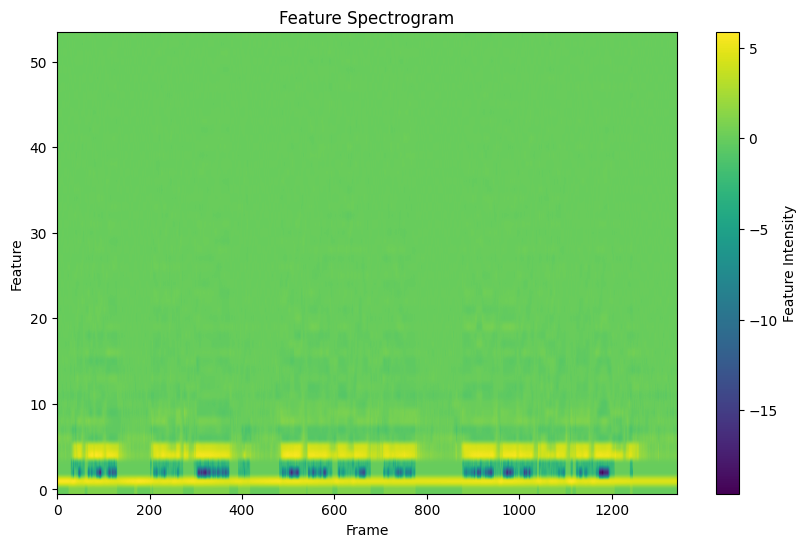

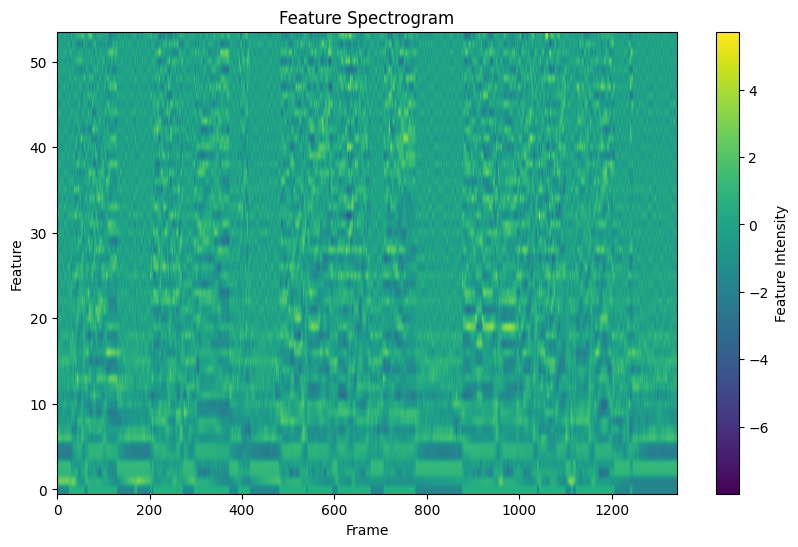

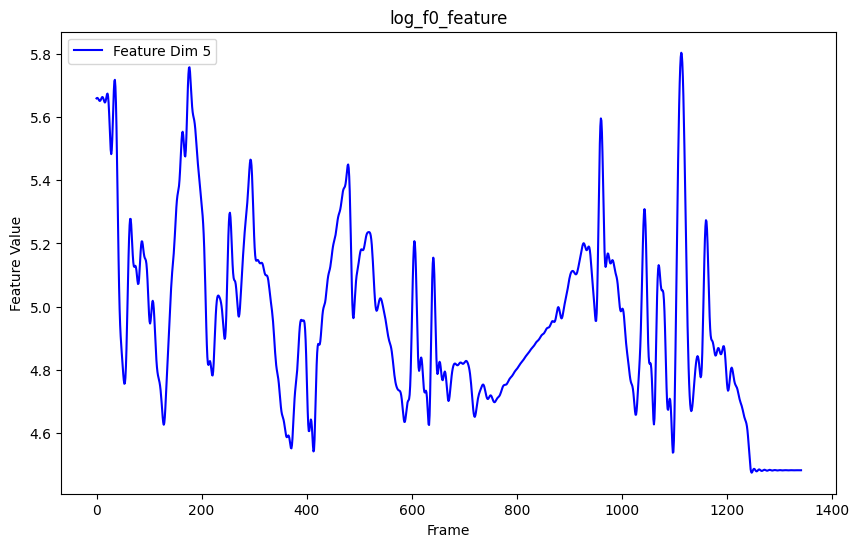

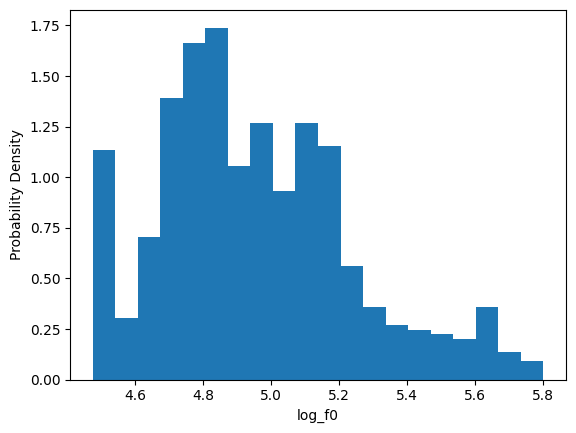

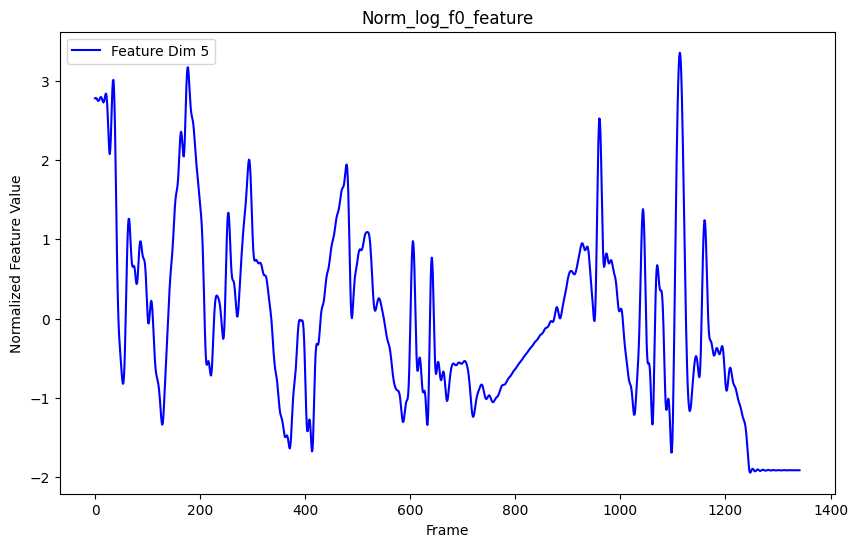

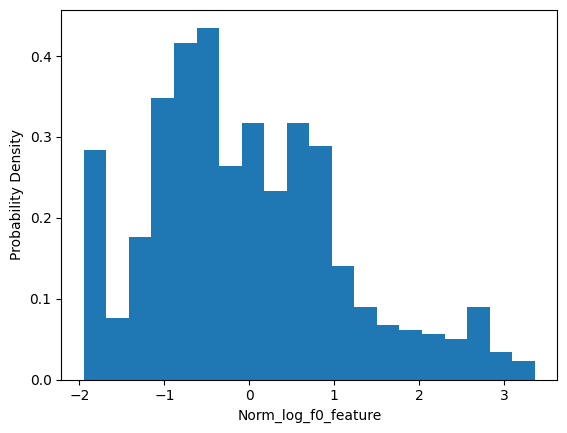

In [10]:
'''
Copyright 2019 Patrick Lumban Tobing (Nagoya University)
Modified and Improved by Katou , 2025
Apache 2.0  (http://www.apache.org/licenses/LICENSE-2.0)

CycleVAEの1×1正規化層では, srcとtrgファイルすべての平均と分散が使用されておりsrcの純粋な統計が反映されていない.
ここで, srcの全ファイルの統計とtrgの全ファイルの統計を完全に分けたうえで計算するスクリプトを作成した.
'''
import os
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#学習データを標準化するテストプログラム
sys.path.append('/cyclevae/src/utils')
from utils import check_hdf5
from utils import read_hdf5
from utils import read_txt
from utils import write_hdf5
from distutils.util import strtobool

working_dir = "/cyclevae/egs/one-to-one"
os.chdir(working_dir)

feats_src='data/tr50_bone_src_air_trg/feats.scp'
filenames = read_txt(feats_src)
scaler_feat_org_lf0_allbone_jnt = StandardScaler()
for filename in filenames:
        #print(filename)
        feat_org_lf0 = read_hdf5(filename, "/feat_org_lf0")
        scaler_feat_org_lf0_allbone_jnt.partial_fit(feat_org_lf0[:, :])
        
mean_feat_org_lf0_allbone_jnt = scaler_feat_org_lf0_allbone_jnt.mean_
#.scale_ はstdを計算.
scale_feat_org_lf0_allbone_jnt = scaler_feat_org_lf0_allbone_jnt.scale_

print(mean_feat_org_lf0_allbone_jnt.shape)
print(scale_feat_org_lf0_allbone_jnt.shape)
print(scale_feat_org_lf0_allbone_jnt)

feats_trg='data/trt50_air_trg_bone_src/feats.scp'
filenames = read_txt(feats_trg)

for filename in filenames:
        #print(filename)
        feat_org_lf0 = read_hdf5(filename, "/feat_org_lf0")
        scaler_feat_org_lf0_allbone_jnt.partial_fit(feat_org_lf0[:, :])

mean_feat_org_lf0_allbone_jnt = scaler_feat_org_lf0_allbone_jnt.mean_
scale_feat_org_lf0_allbone_jnt = scaler_feat_org_lf0_allbone_jnt.scale_


# print(mean_feat_org_lf0_allbone_jnt.shape)
# print(scale_feat_org_lf0_allbone_jnt.shape)
# print(scale_feat_org_lf0_allbone_jnt)

#骨伝導音100音全体の平均、標準偏差を算出
'''
例として、10041の骨伝導音特徴量スペクトログラムを表示
'''
feat_org_lf0=read_hdf5(filenames[0], "/feat_org_lf0")
basepath=os.path.basename(filenames[0])
name=os.path.splitext(basepath)[0]
print("\n\n")
print(f"{name}のshape:{feat_org_lf0.shape}")


feat_org_lf0_norm=scaler_feat_org_lf0_allbone_jnt.transform(feat_org_lf0)


plt.figure(figsize=(10, 6))
plt.imshow(feat_org_lf0.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label="Feature Intensity")
plt.xlabel("Frame")
plt.ylabel("Feature")
plt.title("Feature Spectrogram")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(feat_org_lf0_norm.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label="Feature Intensity")
plt.xlabel("Frame")
plt.ylabel("Feature")
plt.title("Feature Spectrogram")
plt.show()

test=feat_org_lf0[:,1]
plt.figure(figsize=(10, 6))
plt.plot(test, label="Feature Dim 5", color="blue")
plt.xlabel("Frame")
plt.ylabel("Feature Value")
plt.title("log_f0_feature")
plt.legend()
plt.show()

#histgram
plt.hist(test ,bins='auto',density=True)
plt.xlabel("log_f0")
plt.ylabel("Probability Density")
plt.show()

test_norm=feat_org_lf0_norm[:,1]
plt.figure(figsize=(10, 6))
plt.plot(test_norm, label="Feature Dim 5", color="blue")
plt.xlabel("Frame")
plt.ylabel("Normalized Feature Value")
plt.title("Norm_log_f0_feature")
plt.legend()
plt.show()

#histgram
plt.hist(test_norm ,bins='auto',density=True)
plt.xlabel("Norm_log_f0_feature")
plt.ylabel("Probability Density")
plt.show()

In [9]:
feats_src='data/tr50_air_trg_bone_src/feats.scp'
filenames = read_txt(feats_src)
scaler_feat_org_lf0_allair_jnt = StandardScaler()
for filename in filenames:
        #print(filename)
        feat_org_lf0 = read_hdf5(filename, "/feat_org_lf0")
        scaler_feat_org_lf0_allair_jnt.partial_fit(feat_org_lf0[:, :])
        
mean_feat_org_lf0_allair_jnt = scaler_feat_org_lf0_allair_jnt.mean_
scale_feat_org_lf0_allair_jnt = scaler_feat_org_lf0_allair_jnt.scale_

print(mean_feat_org_lf0_allair_jnt.shape)
print(scale_feat_org_lf0_allair_jnt.shape)
print(scale_feat_org_lf0_allair_jnt)

feats_trg='data/trt50_bone_src_air_trg/feats.scp'
filenames = read_txt(feats_trg)

for filename in filenames:
        #print(filename)
        feat_org_lf0 = read_hdf5(filename, "/feat_org_lf0")
        scaler_feat_org_lf0_allair_jnt.partial_fit(feat_org_lf0[:, :])
        
mean_feat_org_lf0_allair_jnt = scaler_feat_org_lf0_allair_jnt.mean_
scale_feat_org_lf0_allair_jnt = scaler_feat_org_lf0_allair_jnt.scale_

print(mean_feat_org_lf0_allair_jnt.shape)
print(scale_feat_org_lf0_allair_jnt.shape)
print(scale_feat_org_lf0_allair_jnt)
#mcepの次元数
print(scale_feat_org_lf0_allair_jnt[5:].shape)
#気導音声全体の平均、標準偏差を算出

(54,)
(54,)
[0.3814212  0.25994371 6.69856675 4.55238846 2.26271404 1.06077771
 0.42592949 0.43820651 0.44135601 0.37906988 0.30129706 0.25066873
 0.26952655 0.17763204 0.19257052 0.1973628  0.19410609 0.14777464
 0.15851724 0.17346781 0.15375545 0.1733012  0.15026003 0.14272091
 0.13745749 0.12452135 0.11445623 0.11374369 0.10898396 0.1097843
 0.09762559 0.09144049 0.09311178 0.09028092 0.08706554 0.08343595
 0.08098488 0.08079346 0.07590756 0.07262616 0.07305621 0.07179625
 0.06787367 0.06400109 0.06199758 0.06057464 0.06196907 0.06180289
 0.05789623 0.05527955 0.05357296 0.05239633 0.05244258 0.05095144]
(54,)
(54,)
[0.38318724 0.26071432 6.7945988  4.64101645 2.2672398  1.06611295
 0.42618162 0.44158874 0.44301159 0.38023266 0.29831236 0.25584646
 0.27191498 0.17663559 0.19249531 0.19932876 0.19526764 0.14788407
 0.158584   0.17683333 0.15427425 0.17257767 0.14974517 0.14114512
 0.13664084 0.12475015 0.11519251 0.11486763 0.10839938 0.10953191
 0.09825709 0.09070802 0.09294188 0.09